In [2]:
import spacy
import pandas as pd
import json
import re
from spacy import displacy

In [3]:
# Load the pre-trained SpaCy model
nlp = spacy.load("en_core_web_sm")

In [5]:
# Sample text data
texts = [
    """
    TechCorp, a leading tech company based in New York, announced on Monday that CEO Jane Doe plans to introduce a new AI-powered smartphone.
    The device, named 'Nexus X,' will debut in Paris next month. Meanwhile, critics like Dr. Mark Smith argue that the launch could impact environmental policies.
    The company also partnered with HealthOrg, a nonprofit, to promote digital wellness. Apple declined to comment on the news.
    The event will coincide with the Global Tech Summit 2024.
    """,

    """
    Lionel Messi, the Argentine footballer, signed a $20 million contract with Miami FC on July 15, 2023.
    The deal was announced during a press conference at Hard Rock Stadium in Florida.
    Fans from across South America flooded social media to celebrate the move.
    """,

    """
    President John Harper met with German Chancellor Angela Weber in Berlin last Friday to discuss NATO policies.
    The United Nations will host a climate summit in Geneva, Switzerland, in December 2025.
    Critics warn that the new tax law (HB 1420) might face delays in Congress.
    """,

    """
    Marie Curie, born in Warsaw in 1867, discovered radium and won the Nobel Prize in Chemistry in 1911.
    In "The Great Gatsby," Jay Gatsby hosts lavish parties in West Egg, New York, reflecting the excesses of the Jazz Age.
    A recent study in Nature Journal links sleep deprivation to decreased cognitive performance.
    """
]

# Data Preparation

In [6]:
# Preprocessing function (same as before, converting text to lowercase and removing special characters)
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z0-9.,\s]', '', text)  # Remove special characters except common punctuation
    return text

In [7]:
# Apply preprocessing
texts = [preprocess_text(text) for text in texts]

# POS-Tagging Implementation

In [8]:
# Function to extract POS tags
def extract_pos_tags(texts):
    pos_tags_list = []
    for text in texts:
        doc = nlp(text)
        for token in doc:
            pos_tags_list.append({"Token": token.text, "POS_Tag": token.pos_})
    return pos_tags_list

# Tagged Dataset

In [13]:
# Extract POS tags
extracted_pos_tags = extract_pos_tags(texts)

# Convert the POS tags to a DataFrame
pos_tags_df = pd.DataFrame(extracted_pos_tags)

# Save to CSV
pos_tags_df.to_csv("pos_tags_output.csv", index=False)

# Save to JSON
with open("pos_tags_output.json", "w") as json_file:
    json.dump(extracted_pos_tags, json_file, indent=4)


Visualizations

In [17]:
# Visualize POS tags using displacy
displacy.render(nlp(texts[0]), style="dep", jupyter=True)

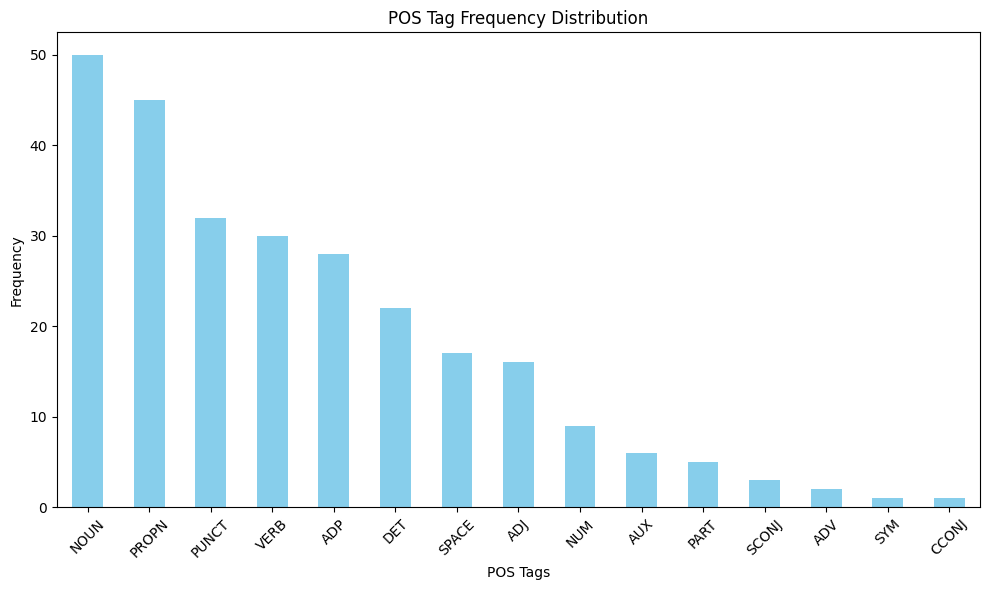

In [15]:
import matplotlib.pyplot as plt

# Count the frequency of each POS tag
pos_tag_counts = pos_tags_df['POS_Tag'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
pos_tag_counts.plot(kind='bar', color='skyblue')
plt.title('POS Tag Frequency Distribution')
plt.xlabel('POS Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
